<a href="https://colab.research.google.com/github/Ali-Tarhini/Repository1/blob/master/Diamond_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Unnamed: 0  carat      cut color clarity  ...  table  price     x     y     z
0           1   0.23    Ideal     E     SI2  ...   55.0    326  3.95  3.98  2.43
1           2   0.21  Premium     E     SI1  ...   61.0    326  3.89  3.84  2.31
2           3   0.23     Good     E     VS1  ...   65.0    327  4.05  4.07  2.31
3           4   0.29  Premium     I     VS2  ...   58.0    334  4.20  4.23  2.63
4           5   0.31     Good     J     SI2  ...   58.0    335  4.34  4.35  2.75

[5 rows x 11 columns]
         Unnamed: 0         carat  ...             y             z
count  53940.000000  53940.000000  ...  53940.000000  53940.000000
mean   26970.500000      0.797940  ...      5.734526      3.538734
std    15571.281097      0.474011  ...      1.142135      0.705699
min        1.000000      0.200000  ...      0.000000      0.000000
25%    13485.750000      0.400000  ...      4.720000      2.910000
50%    26970.500000      0.700000  ...      5.710000      3.530000
75%    40455.250000   

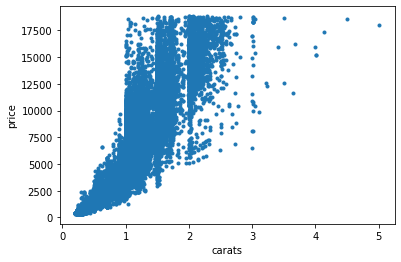

          carat     table  price  ...  cut_index  clarity_index  color_index
52638  0.047904  0.610526    552  ...        0.6            0.8     0.714286
35855  0.063872  0.600000    917  ...        1.0            0.9     1.000000
29483  0.063872  0.578947    702  ...        0.6            0.6     0.857143
32579  0.071856  0.589474    801  ...        1.0            0.5     1.000000
2496   0.153693  0.568421   3197  ...        0.6            0.7     0.571429

[5 rows x 9 columns]


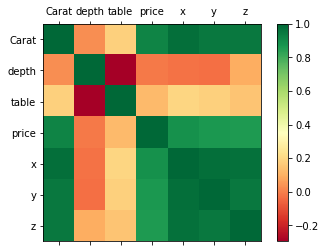

In [ ]:
# Database description:
# A data frame with 53940 rows and 10 variables:
# price
# price in US dollars (\$326--\$18,823)
# carat
# weight of the diamond (0.2--5.01)
# cut
# quality of the cut (Fair, Good, Very Good, Premium, Ideal)
# color
# diamond colour, from J (worst) to D (best)
# clarity
# a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
# x
# length in mm (0--10.74)
# y
# width in mm (0--58.9)
# z
# depth in mm (0--31.8)
# depth
# total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
# table
# width of top of diamond relative to widest point (43--95)

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.utils import shuffle

# Read the database and take a look at it
df = pd.read_csv("diamonds.csv")
print(df.head()) 
print(df.describe())

# Visualize the price as a function of carats
plt.scatter(df["carat"].values, df["price"].values, marker='.')
plt.xlabel("carats")
plt.ylabel("price")
plt.show()

# Define dictionaries to transform the categorical attributes to numerical ones
cut_class_dict = {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}
clarity_dict = {"I3": 1, "I2": 2, "I1": 3, "SI2": 4, "SI1": 5, "VS2": 6, "VS1": 7, "VVS2": 8, "VVS1": 9, "IF": 10, "FL": 11}
color_dict = {"J": 1,"I": 2,"H": 3,"G": 4,"F": 5,"E": 6,"D": 7}

# Create new columns for the transformed attributes
for row in df:
    df['cut_index'] = df['cut'].map(cut_class_dict)
    df['clarity_index'] = df['clarity'].map(clarity_dict)
    df['color_index'] = df['color'].map(color_dict)


# Drop unnecessary columns then shuffle the rows
df = df.drop(['Unnamed: 0', 'cut', 'color', 'clarity'], axis=1).copy()
df = shuffle(df)

# Show the correlation between the numerical  columns
fig = plt.figure()
ax = fig.add_subplot(111)
corr_mat = df.drop(['cut_index', 'clarity_index','color_index'], axis=1).corr()
cax = ax.matshow(corr_mat, cmap=plt.cm.RdYlGn)
fig.colorbar(cax)
# Adjust the x and y labels
labels = ['', 'Carat', 'depth', 'table', 'price', 'x', 'y', 'z']
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.savefig('CORRELATION PLOT.png')

df.drop(['depth'], inplace=True, axis=1)

# Transform the training data to numbers between 0 and 1
columns = df.drop('price', axis=1).columns
for column in columns:
    max_value = df[column].max()
    df[column] = df[column] / max_value
print(df.head())

#seperate between testing features and labels
X = df.drop('price', axis=1).values
y = df['price'].values

# Save the obtained variables for future reference
pickle.dump(X, open("diamond_features.pickle", 'wb'))
pickle.dump(y, open("diamond_prices.pickle", 'wb'))


In [102]:
#building the model
import pickle
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential

# Define the model, 3 dense hidden layers and an output layer
def buildModel():
  model = Sequential()
  model.add(Dense(128, activation='relu', input_shape=(8,)))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(1))
                     
  optimizer = tf.keras.optimizers.Adam(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics='mae')
  return model

# Get the training data and build the model
X = np.array(pickle.load(open("diamond_features.pickle", "rb")))
y = np.array(pickle.load(open("diamond_prices.pickle", "rb")))
model = buildModel()

print(model.summary()) # View some details about the model

# Train the model
train_history = model.fit(X, y, epochs=50, validation_split = 0.12)



Model: "sequential_88"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_343 (Dense)            (None, 128)               1152      
_________________________________________________________________
dense_344 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_345 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_346 (Dense)            (None, 1)                 33        
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
1484/1484 [==============================] - 2s 2ms/step - loss: 12311939.0000 - mae: 2455.0068 - val_loss: 3699176.5000 - val_mae: 1211.0327
Epoch 2/50
1484/1484 [==============================] - 2s 2ms/step - loss: 1954854.0000 

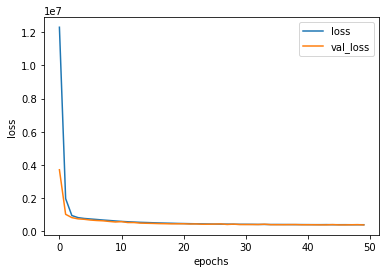

In [104]:
# Plot the loss graph
loss = train_history.history['loss']
val_loss = train_history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['loss', 'val_loss'])
plt.savefig('Results.png')

model.save("model.h5") # Save the model for future access